# Assignment 3 (Clustering with K-means), a23emisn & a23petny

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import joblib as jb

from sklearn.cluster import KMeans

In [2]:
# 1. Load the wine dataset

In [3]:
wine = datasets.load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# 2. Create the dataset that we can use for unsupervised learning, that means without the target data.

In [6]:
X = wine.data

In [7]:
# 3. Create a data frame for that data (the dataset without the labels (targets).

In [8]:
df = pd.DataFrame(X, columns = wine.feature_names)
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [9]:
# 4. Visualize the dataset and investigate: How many clusters would you suspect be suitable for this dataset just by looking at the visualization?

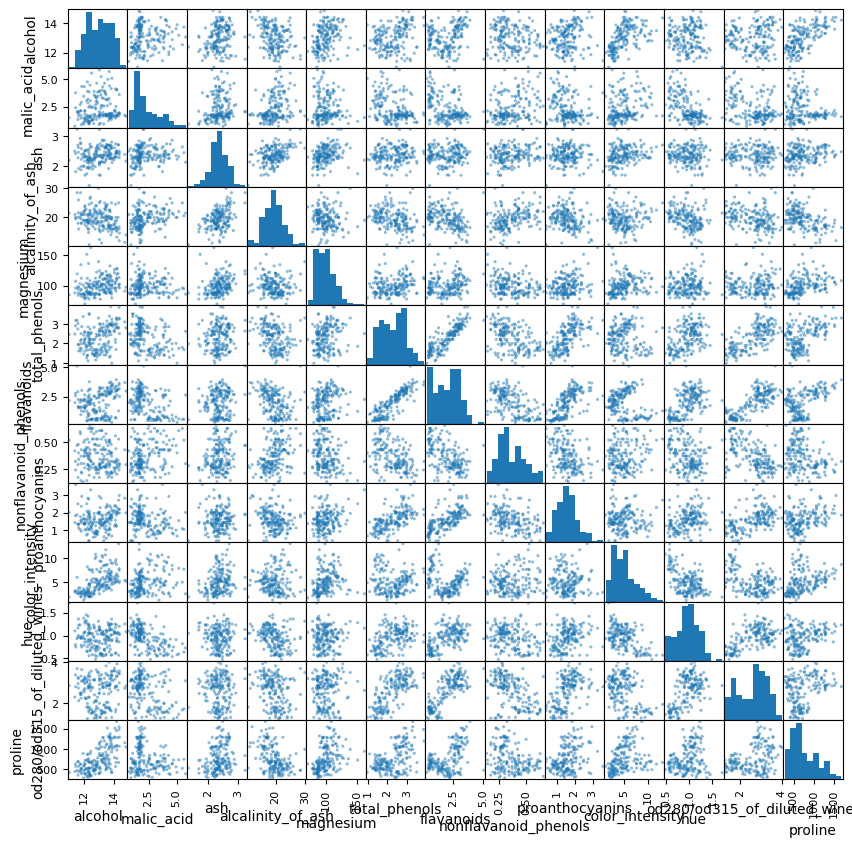

In [10]:
visual = pd.plotting.scatter_matrix(df, figsize = [10,10], s = 20)

From looking at the visualization alone, it's hard to tell how many clusters that might be in the dataset. The scatter plots do not contain any clearly distinguishable clusters of data. The only slight There are some vague indications of two separate clusters, especially for the malic_acid and  flavanoids features.

In [11]:
# 5. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? Explain why?

In [12]:
df.describe() 

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

Some features that might be of better use for clustering could be proline, flavanoid and total_phenols. For the latter two in particular we can clearly see a linear relationship, there aren't really any other visual clues that can point to which features would be important for clustering.

In [13]:
# 6. Use the Elbow method to identify a suitable number of clusters

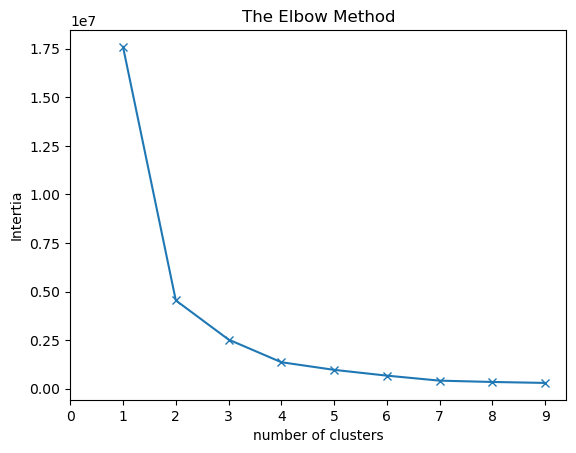

In [14]:
inta = [np.mean([KMeans(n_clusters = i).fit(X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

In [15]:
# 6.1 What number of clusters would you suggest based on the Elbow method?

The "elbow" seems to sit a ~3 clusters. We start so see the steep decline taper off at 2 clusters, but then at 3 it really starts to level and more clusters do not further decrease the inertia.

In [16]:
# 6.2 Motivate that answer

By looking at the graph, we start to see a diminishing of returns at 2-3 clusters. This suggests that more clusters than this do not explain the variance in the dataset well enough to pay off. At 3 clusters, the decrease starts leveling off.

In [17]:
# 7. Normalize the dataset

In [18]:
normalized_X = preprocessing.normalize(X)

In [19]:
# 8. Explain what normalization does

In [20]:
# 8.1 In general

Normalization scales the samples to a standard lenght of 1, like: [0, 1] or [-1, 1]). By doing this we can prevent features with larger ranges from dominating and skewing the model. It's not always needed, unless features have different ranges. 

In [21]:
# 8.2 How would you expect this to influence the k-means clustering algorithm?

Since the ranges of the dataset features are different for each feature, the normalization will help to adjust this. In doing this we can mitigate the risk that larger ranges dominate and skew our model, making clusters harder to identify.

In [22]:
# 9. Visualize the normalized data and investigate: How many clusters would you suspect be suitable for this normalized dataset just by looking at the visualization?

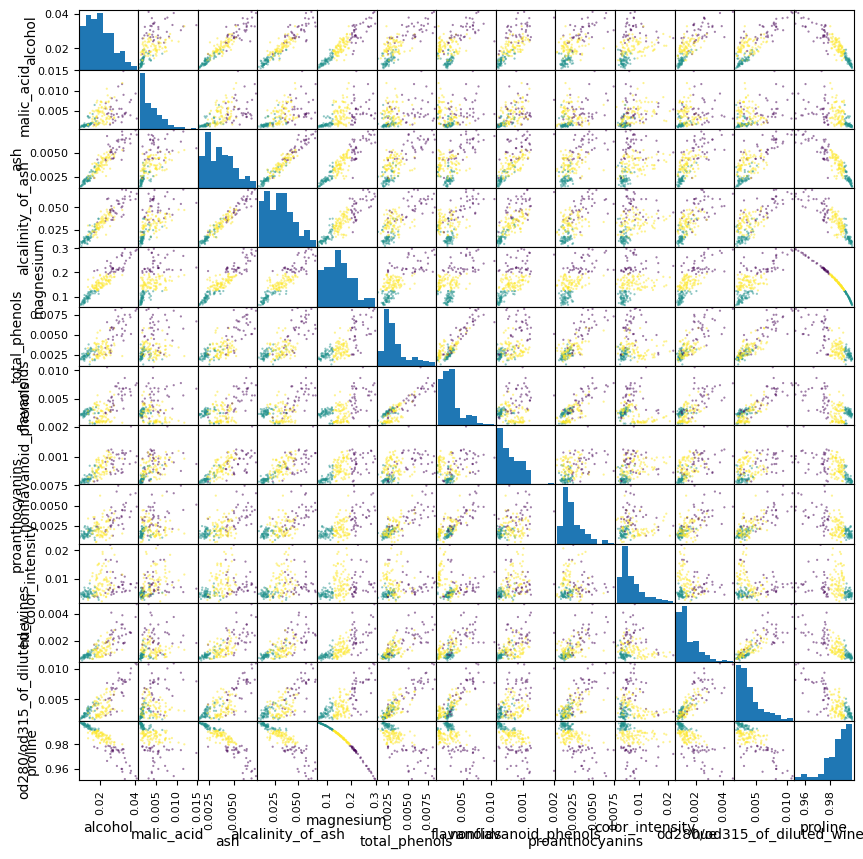

In [23]:
normalized_df = pd.DataFrame(normalized_X, columns = wine['feature_names'])
a = pd.plotting.scatter_matrix(normalized_df, figsize = [10,10], c = KMeans(n_clusters = 3).fit(normalized_X).labels_, s = 10)

After the dataset has been normalized. From looking at this, it's quite clear there are atleast two clusters. This is seen in flavanoids and total phenols. However, all of the scatter plots with "two clearly" identifiable clusters, also possess a tail that possibly could be a third cluster.

In [24]:
#10. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? Explain why? 

In [25]:
normalized_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.019950    0.003711    0.003644           0.031124    0.151541   
std      0.007321    0.002499    0.001409           0.014671    0.054081   
min      0.008428    0.000944    0.001473           0.007739    0.064147   
25%      0.013548    0.001684    0.002359           0.017615    0.109775   
50%      0.018984    0.003174    0.003468           0.030036    0.146777   
75%      0.024783    0.004981    0.004506           0.040010    0.183082   
max      0.041106    0.014852    0.007305           0.069703    0.297958   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.003444    0.002973              0.000581         0.002396   
std         0.001543    0.001802              0.000327         0.001249   
min         0.001255    0.000637              0.000145         0.000554   
25%         0.002385    0.001746              0.000277         0.001515   
50%         0.002946    0.002721              0.000514         0.002030   
75%         0.003886    0.003551              0.000833         0.003040   
max         0.008404    0.010560              0.002008         0.007469   

       color_intensity         hue  od280/od315_of_diluted_wines     proline  
count       178.000000  178.000000                    178.000000  178.000000  
mean          0.007342    0.001477                      0.003993    0.986018  
std           0.003843    0.000736                      0.001979    0.010073  
min           0.002241    0.000579                      0.001675    0.951812  
25%           0.004612    0.000970                      0.002535    0.981687  
50%           0.005981    0.001232                      0.003384    0.988441  
75%           0.008853    0.001834                      0.004870    0.993564  
max           0.021876    0.004727                      0.010858    0.997835

magnesium, proline, and alcalinity_of_ash, ash, alcohol. These show a very clear counter-linear properties, which might explain 

In [26]:
#11. Use the Elbow method to identify a suitable number of clusters

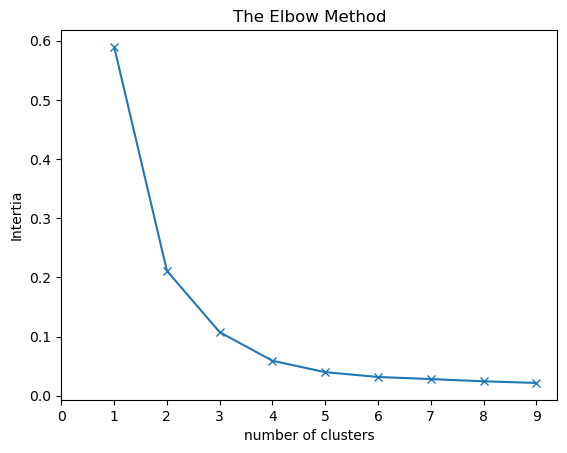

In [27]:
inta = [np.mean([KMeans(n_clusters = i).fit(normalized_X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

In [28]:
# 11.1 What number of clusters would you suggest based on the Elbow method?

4

In [29]:
# 11.2 Motivate that answer

At 4 clusters, the inertia tapers off and adding more than these clearly do not lower the inertia furhter than so.

In [30]:
# 12. Present the number of clusters that you would settle for 
# (taking both, your investigation for the original and the normalized dataset into account) and motivate your answer.

We chose 4. The elbow method for the normalized data had a much clearer nr of clusters were the inertia stopped decreasing steadily: at 4 clusters. The previous elbow did not show this as well, since it was hard to define whether the threshold was at 2 or 3. 

In [31]:
# 13. Build two more cluster models: model_3 and modle_3N, with 3 clusters each and based on the original and the normalized dataset respectively.

In [32]:
model_3, model_3N = [KMeans(n_clusters = 3).fit(i) for i in [X, normalized_X]]

In [33]:
# 14. Compare the clustering of wine by their chemical features with the original classification by winery (the original target values in the dataset).

this is for KMeans model_3


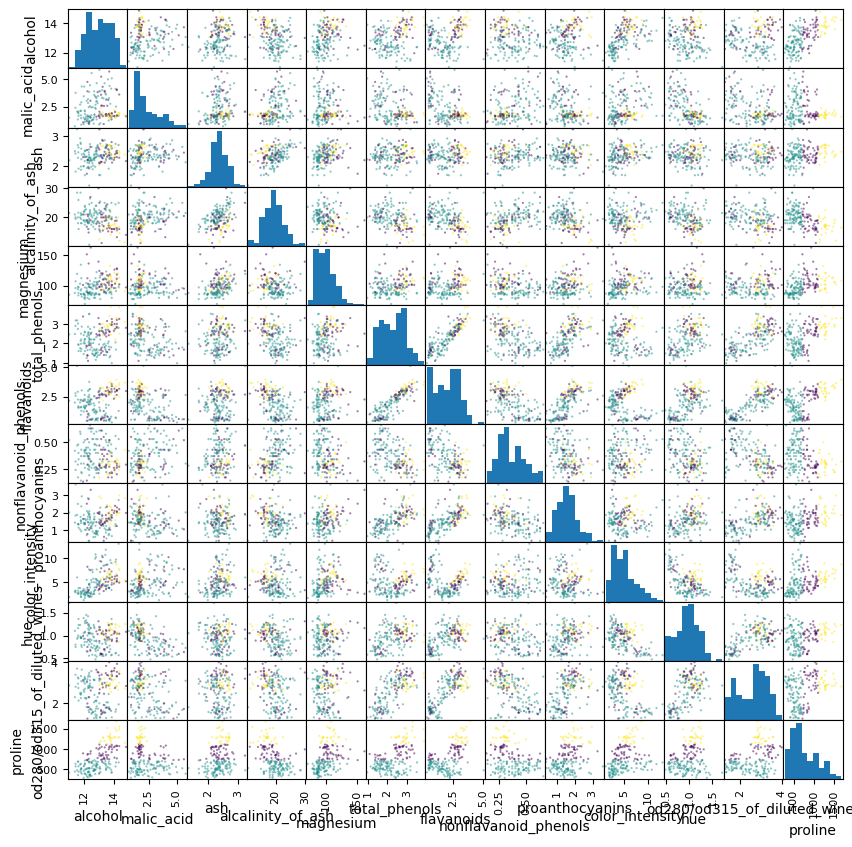

this is for KMeans model_3N


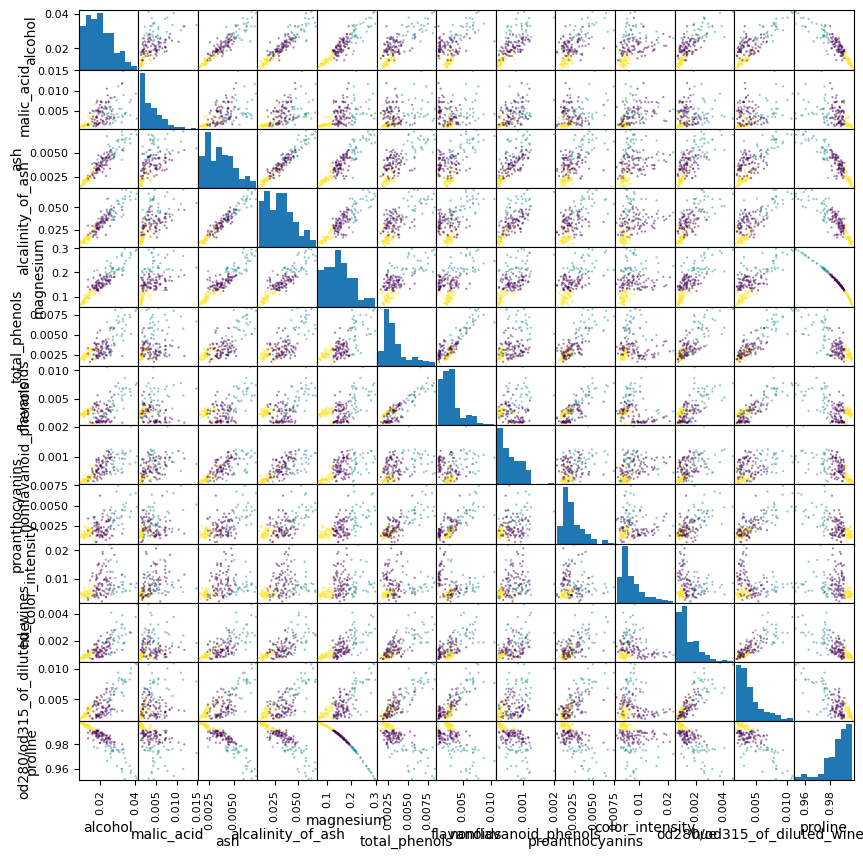

In [34]:
l = [(X, 'normal', 'model_3', df), (normalized_X,'normalized', 'model_3N', normalized_df)]
_ = [(pd.plotting.scatter_matrix(d, figsize = [10,10], c = KMeans(n_clusters = 3).fit(i).labels_, s = 10), print(f'this is for KMeans {m}'),  plt.show()) for i,_,m,d in l]

this is for target of type normal


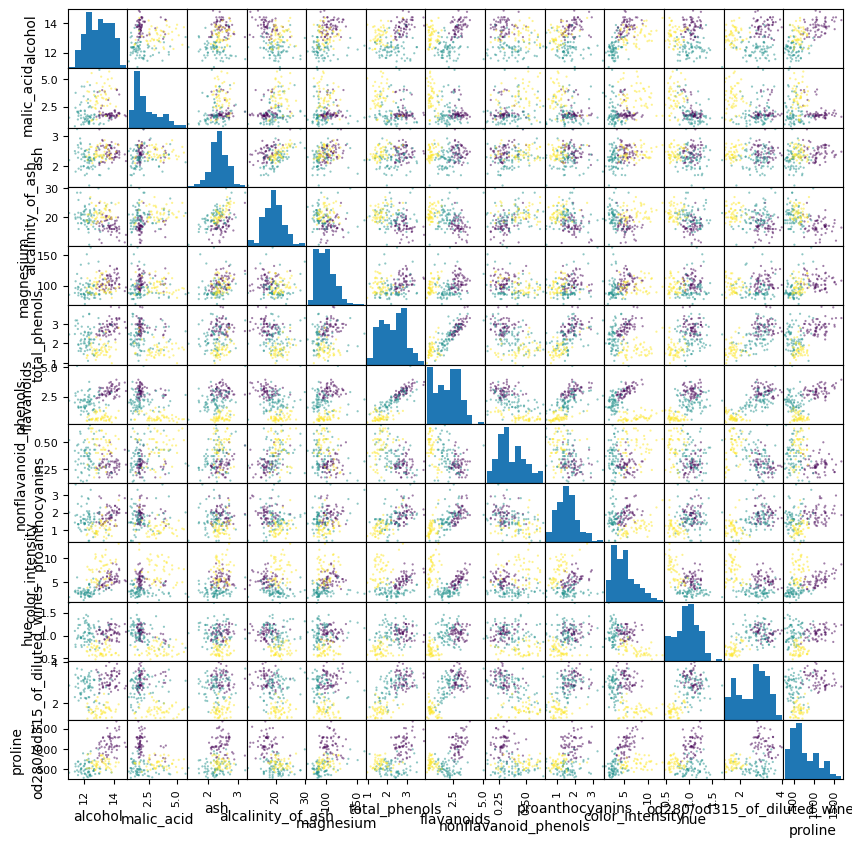

this is for target of type normalized


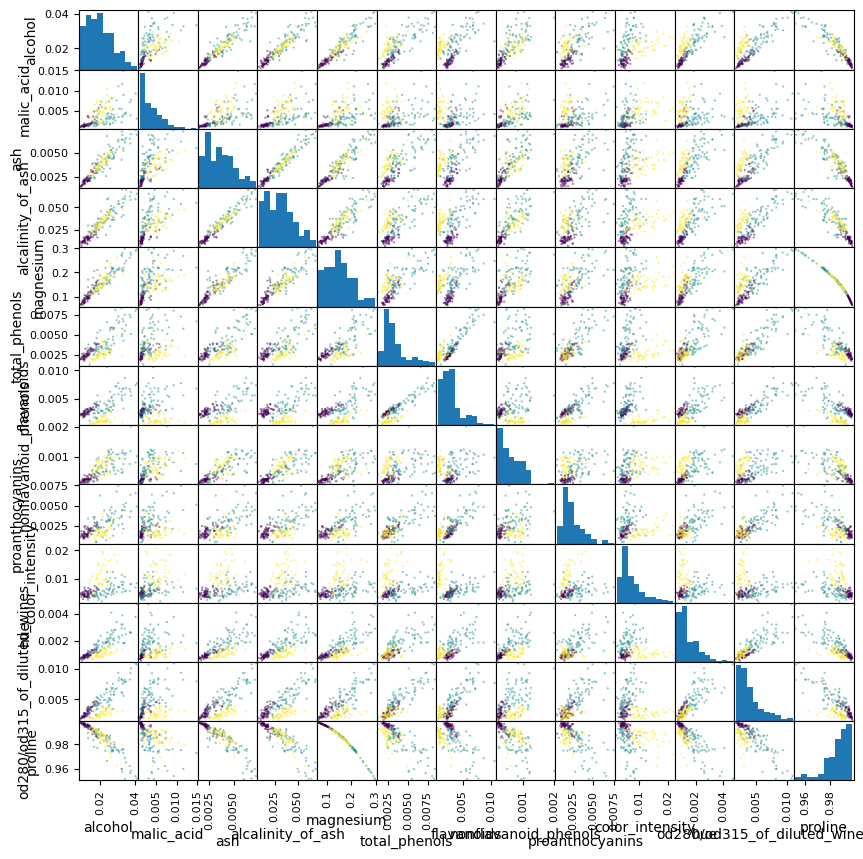

In [35]:
_ = [(pd.plotting.scatter_matrix(d, figsize = [10,10], c = wine['target'], s = 10), print(f'this is for target of type {t}'),  plt.show()) for i,t,_,d in l]

In [40]:
_ = [print(f'{m}: {np.mean([accuracy_score(wine['target'], KMeans(n_clusters = 3).fit(i).labels_) for _ in range(1000)]):.4f}') for i,_,m,_ in l]

model_3: 0.2968
model_3N: 0.3562


Cluster numbers from K-means are arbitrary, so accuracy on the wine labels can look bad even if the clustering is fine.

In [37]:
# 15. You can use the crosstab for this analysis. (Be aware of e.g. randomness in the algorithms and how this will affect what you see in the crosstab.)
#Describe your findings carefully.

In [38]:
pd.crosstab(wine['target'], model_3N.labels_, rownames=['labels'], colnames=['prediction'])

prediction   0   1   2
labels                
0            6  53   0
1           45  12  14
2           30  15   3

In [39]:
pd.crosstab(wine['target'], model_3.labels_, rownames=['labels'], colnames=['prediction'])

prediction   0   1   2
labels                
0           13  46   0
1           20   1  50
2           29   0  19

Do something else